<a href="https://colab.research.google.com/github/Marciorochar/Analise-Preditiva/blob/main/An%C3%A1lises/Sazonalidade_Semanal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Iremos apresentar gráficos sobre Sazonalidade Semanal

Saving 25.04.22.Dados (1).xlsx to 25.04.22.Dados (1).xlsx


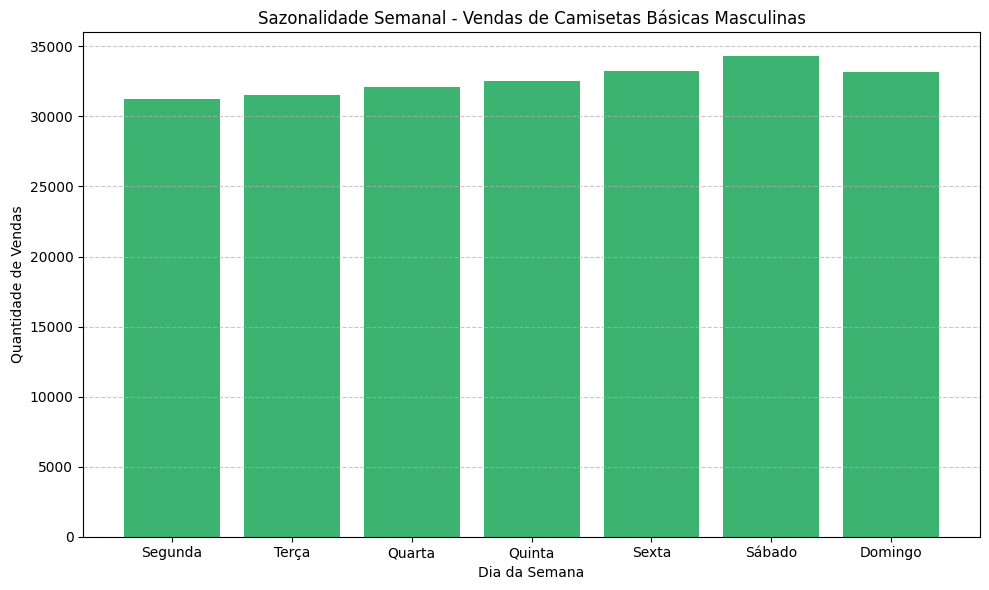

In [ ]:
# Instalar bibliotecas necessárias
!pip install pandas matplotlib openpyxl

# Imports
import pandas as pd
import matplotlib.pyplot as plt

# Upload do arquivo Excel
from google.colab import files
uploaded = files.upload()

# Ler o arquivo Excel enviado
nome_arquivo = list(uploaded.keys())[0]
df = pd.read_excel(nome_arquivo)

# Converter colunas
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True, errors='coerce')
df['Camisetas_básicas_masculinas'] = pd.to_numeric(df['Camisetas_básicas_masculinas'], errors='coerce')

# Criar coluna com dia da semana em inglês
df['dia da semana'] = df['Timestamp'].dt.day_name()

# Traduzir dias para português manualmente
dias_pt = {
    'Monday': 'Segunda',
    'Tuesday': 'Terça',
    'Wednesday': 'Quarta',
    'Thursday': 'Quinta',
    'Friday': 'Sexta',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
df['dia da semana'] = df['dia da semana'].map(dias_pt)

# Agrupar por dia da semana (na ordem correta)
ordem_dias = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
vendas_semanais = df.groupby('dia da semana')['Camisetas_básicas_masculinas'].sum().reindex(ordem_dias)

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.bar(vendas_semanais.index, vendas_semanais.values, color='mediumseagreen')
plt.title('Sazonalidade Semanal - Vendas de Camisetas Básicas Masculinas')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Vendas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()